# Heart Disease Data Set

Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

# Import the required libraries and import the dataset

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# Load the Dataset in the notebook
df = pd.read_csv('heartdisease_data.csv',header=None)
df = df.apply(pd.to_numeric, errors='coerce')

# Display first 5 rows of the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [3]:
# Lets rename the columns as mentioned above

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 
              'slope', 'ca', 'thal', 'goal']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [4]:
# lets first replace ? with the null values

df = df.replace("?",np.nan)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [5]:
# lets check for the null values

df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
goal          0
dtype: int64

In [6]:
# check statistics info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  goal      200 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 22.0 KB


In [7]:
objects = ['trestbps','chol','fbs','thalach','exang','oldpeak','slope','ca','thal']
numerical = ['age','sex','cp','restecg','goal']

In [8]:
for each in objects:
    print(f"{each}: ", df[each].unique())
    print("*****************************************************************")

trestbps:  [140. 130. 132. 142. 110. 120. 150. 180. 160. 126.  nan 128. 170. 152.
 116. 124.   0. 122. 144. 154. 125. 104. 136. 134. 138. 178. 146. 135.
 158. 106. 112. 102.  96. 172. 155. 156. 118. 100. 190. 114. 127.]
*****************************************************************
chol:  [260. 209. 218. 228. 213.   0. 236. 267. 166. 220. 177. 186. 100. 171.
 230. 281. 203. 277. 233. 240. 153. 224. 316. 311. 270. 217. 214. 252.
 339. 216. 276. 458. 241. 384. 297. 248. 308. 208. 227. 210. 245. 225.
 198. 195. 161. 258. 235. 305. 223. 282. 349.  nan 160. 312. 283. 142.
 211. 306. 222. 202. 197. 204. 274. 192. 298. 272. 200. 261. 181. 221.
 175. 219. 310. 232. 273. 182. 292. 289. 193. 170. 369. 173. 271. 244.
 285. 243. 237. 165. 287. 256. 264. 226. 207. 284. 337. 254. 300. 333.
 139. 385.]
*****************************************************************
fbs:  [ 0.  1. nan]
*****************************************************************
thalach:  [112. 127. 140. 149.  99. 120. 105. 

In [9]:
for each in numerical:
    print(f"{each}: ", df[each].unique())
    print("*****************************************************************")

age:  [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]
*****************************************************************
sex:  [1 0]
*****************************************************************
cp:  [4 3 2 1]
*****************************************************************
restecg:  [1 2 0]
*****************************************************************
goal:  [2 0 1 3 4]
*****************************************************************


In [10]:
df['goal'] = df.goal.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['goal'].unique()

array([1, 0])

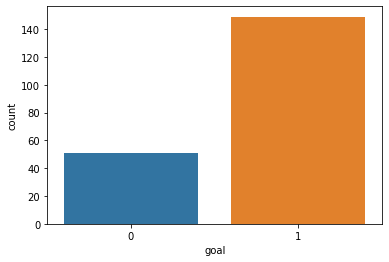

In [11]:
sns.countplot(x='goal',data=df)
plt.show()

Lets treat all the nan values present in the dataset

In [12]:
# filling nan in thal with random number 4 (it has not meaning only representation)
df['thal'] = df.thal.fillna(4)
df['thal'].unique()

array([4., 3., 7., 6.])

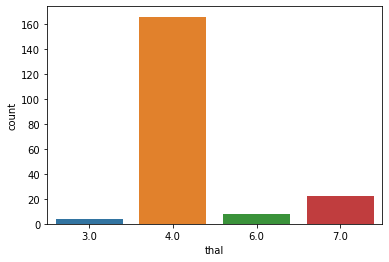

In [13]:
sns.countplot(x='thal',data=df)
plt.show()

In [14]:
df['thalach'].isnull().sum()

53

In [15]:
#53 Null values in thalach. lets replace them with the mean

df['thalach'] = df.thal.fillna(df['thalach'].mean())

In [16]:
df['thalach'].isnull().sum()

0

In [17]:
# filling nan in thal with random number 4 (it has not meaning only representation)
df['exang'] = df['exang'].fillna(2)

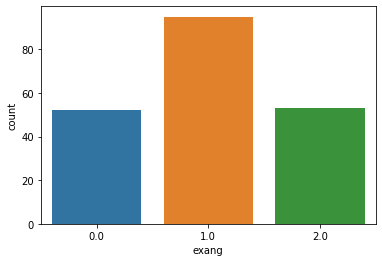

In [18]:
sns.countplot(x='exang',data=df)
plt.show()

In [19]:
df['oldpeak'].isnull().sum()

56

In [20]:
#56 Null values in oldpeak. lets replace them with the mean

df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [21]:
df['oldpeak'].isnull().sum()

0

In [22]:
# filling nan in slope with random number 4 (it has not meaning only representation)
df['slope'] = df['slope'].fillna(4)

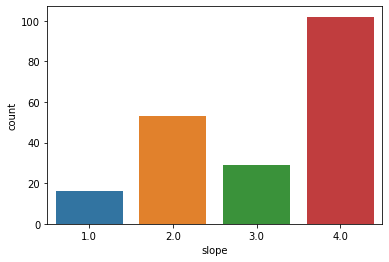

In [23]:
sns.countplot(x='slope',data=df)
plt.show()

In [24]:
df['ca'].isnull().sum()

198

In [25]:
#Since cal column huge null data so it is better to drop this column.
df.drop(['ca'],axis=1,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,goal
0,63,1,4,140.0,260.0,0.0,1,4.0,1.0,3.0,2.0,4.0,1
1,44,1,4,130.0,209.0,0.0,1,4.0,0.0,0.0,4.0,4.0,0
2,60,1,4,132.0,218.0,0.0,1,4.0,1.0,1.5,3.0,4.0,1
3,55,1,4,142.0,228.0,0.0,1,4.0,1.0,2.5,1.0,4.0,1
4,66,1,3,110.0,213.0,1.0,2,4.0,1.0,1.3,2.0,4.0,0


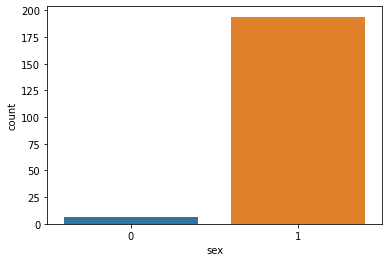

In [26]:
sns.countplot(x='sex',data=df)
plt.show()

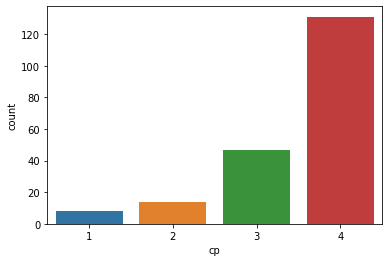

In [27]:
sns.countplot(x='cp',data=df)
plt.show()

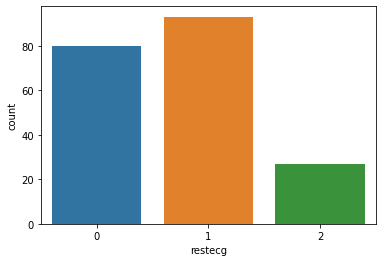

In [28]:
sns.countplot(x='restecg',data=df)
plt.show()

In [29]:
#56 Null values in trestbps. lets replace them with the mean

df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

In [30]:
#7 Null values in chol. lets replace them with the mean

df['chol'] = df['chol'].fillna(df['chol'].mean())

In [31]:
# filling nan in fbs with random number 3 (it has not meaning only representation)
df['fbs'] = df['fbs'].fillna(3)

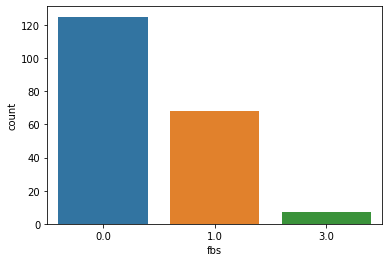

In [32]:
sns.countplot(x='fbs',data=df)
plt.show()

Lets look at the distribution of age vs goal

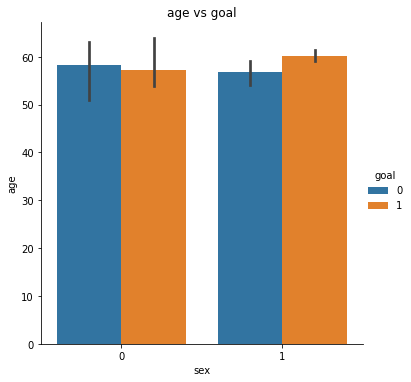

In [33]:
sns.catplot(x='sex', y='age',kind ='bar', data=df,  hue='goal')
plt.title('age vs goal')
plt.show()

cp vs age ploting

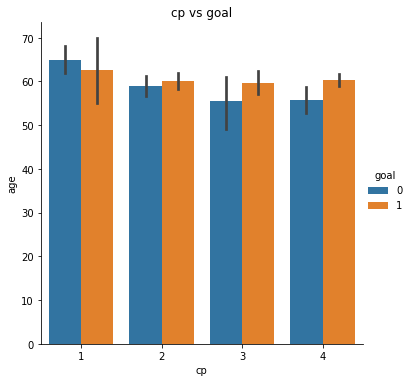

In [34]:
sns.catplot(x='cp', y='age',kind ='bar', data=df,  hue='goal')
plt.title('cp vs goal')
plt.show()

fbs vs age ploting

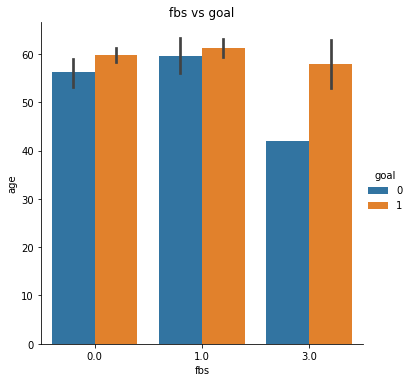

In [35]:
sns.catplot(x='fbs', y='age',kind ='bar', data=df,  hue='goal')
plt.title('fbs vs goal')
plt.show()

restecg vs age ploting

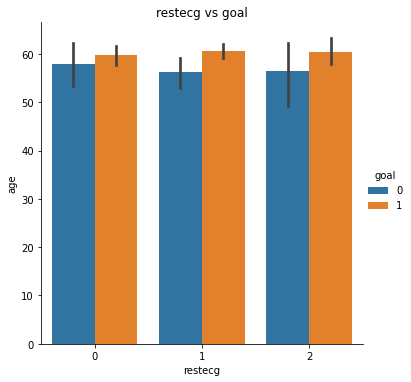

In [36]:
sns.catplot(x='restecg', y='age',kind ='bar', data=df,  hue='goal')
plt.title('restecg vs goal')
plt.show()

thalach vs age ploting

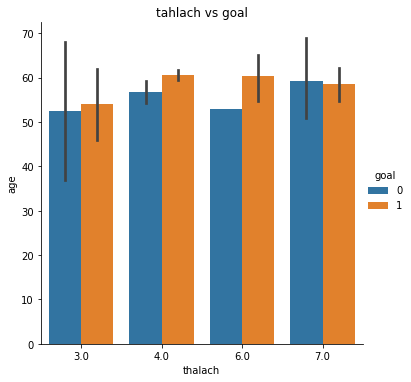

In [37]:
sns.catplot(x='thalach', y='age',kind ='bar', data=df,  hue='goal')
plt.title('tahlach vs goal')
plt.show()

exang vs age ploting

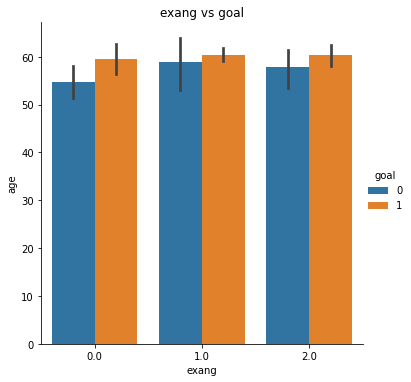

In [38]:
sns.catplot(x='exang', y='age',kind ='bar', data=df,  hue='goal')
plt.title('exang vs goal')
plt.show()

oldpeak vs age ploting

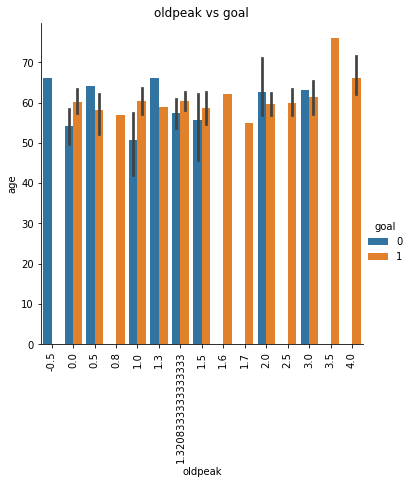

In [39]:
sns.catplot(x='oldpeak', y='age',kind ='bar', data=df,  hue='goal')
plt.title('oldpeak vs goal')
plt.xticks(rotation = 90)
plt.show()

slope vs age ploting

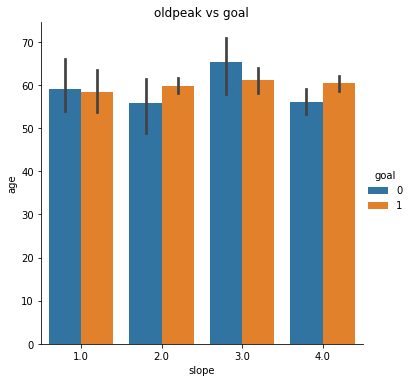

In [40]:
sns.catplot(x='slope', y='age',kind ='bar', data=df,  hue='goal')
plt.title('oldpeak vs goal')
plt.show()

thal vs age ploting

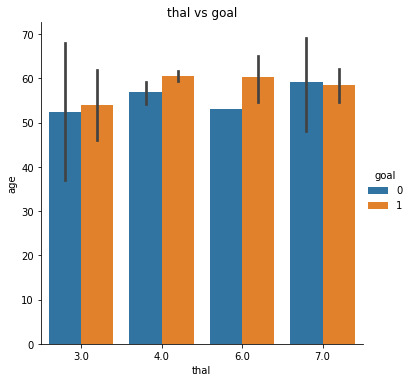

In [41]:
sns.catplot(x='thal', y='age',kind ='bar', data=df,  hue='goal')
plt.title('thal vs goal')
plt.show()

Lets check the skewness

In [42]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         1.913994
restecg     0.391463
thalach     1.981590
exang      -0.007615
oldpeak     0.423414
slope      -0.597696
thal        1.981590
goal       -1.132724
dtype: float64

In [43]:
# we will use the log1p function from the numpy library to treat the skewness.
df['trestbps'] = np.log1p(df['trestbps'])

In [44]:
df['thalach'] = np.log1p(df['thalach'])

In [45]:
df.skew()

age         -0.404091
sex         -5.552105
cp          -1.648734
trestbps   -12.121625
chol        -0.571879
fbs          1.913994
restecg      0.391463
thalach      1.845040
exang       -0.007615
oldpeak      0.423414
slope       -0.597696
thal         1.981590
goal        -1.132724
dtype: float64

Dividing the datset into x(predictors) and y(target)

In [46]:
x = df.drop(['goal'], axis=1)
y = df['goal']

In [47]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63,1,4,4.948760,260.0,0.0,1,1.609438,1.0,3.0,2.0,4.0
1,44,1,4,4.875197,209.0,0.0,1,1.609438,0.0,0.0,4.0,4.0
2,60,1,4,4.890349,218.0,0.0,1,1.609438,1.0,1.5,3.0,4.0
3,55,1,4,4.962845,228.0,0.0,1,1.609438,1.0,2.5,1.0,4.0
4,66,1,3,4.709530,213.0,1.0,2,1.609438,1.0,1.3,2.0,4.0


In [48]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: goal, dtype: int64

Finding the best random state to find the divide x and y into test and train dataset

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [50]:
random_state=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred = lg.predict(x_test)
    tempaccu = accuracy_score(y_pred,y_test)
    if tempaccu > accu:
        accu = tempaccu
        random_state = i
print(f"Best Accuracy {accu*100} found on Random state {random_state}")

Best Accuracy 90.0 found on Random state 33


The best accuracy of 90 is found at Random state 33

In [51]:
# creating train test split using the best random state which we found above
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=35)

Finding the best Model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [53]:
algorithms = [LogisticRegression,RandomForestClassifier,SGDClassifier,DecisionTreeClassifier,
        KNeighborsClassifier,GaussianNB]

for each in algorithms:
    model = each()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracyscore = accuracy_score(y_test,y_pred)
    cvscore = cross_val_score(each(), x_train, y_train, cv=5).mean()
    print(f"{model}\n",classification_report(y_test, y_pred))
    print("\n")
    print(f"Accuracy= {accuracyscore*100}, cross_val_score= {cvscore*100} & difference= {(accuracyscore*100)-(cvscore*100)}")
    print("*****************************************************************************************************************")
    print("\n")

LogisticRegression()
               precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.85      0.94      0.89        31

    accuracy                           0.82        40
   macro avg       0.76      0.69      0.71        40
weighted avg       0.81      0.82      0.81        40



Accuracy= 82.5, cross_val_score= 68.75 & difference= 13.75
*****************************************************************************************************************


RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.88      0.97      0.92        31

    accuracy                           0.88        40
   macro avg       0.86      0.76      0.79        40
weighted avg       0.87      0.88      0.87        40



Accuracy= 87.5, cross_val_score= 76.875 & difference= 10.625
**********************************************************

RandomForestClassifer has the best accuracy in this case:


Accuracy= 87.5, cross_val_score= 76.875 & difference= 10.625


But we also see that KNeighborsClassifier() has also given very less difference between Accuracy and cross_val_score. 


Hence we will choose KNeighborsClassifier() has the best one for this problem.